In [3]:
import pandas as pd
import datetime 
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io


In [4]:
df = pd.read_csv('2017_CO2_IntensEL_EEA.csv')
print(df.head())


  CountryShort CountryLong  Year  ValueNumeric      Unit Data_source
0         EU28       EU-28  1990    531.232975  gCO2/kWh         EEA
1         EU28       EU-28  1991    516.034467  gCO2/kWh         EEA
2         EU28       EU-28  1992    503.571112  gCO2/kWh         EEA
3         EU28       EU-28  1993    473.999118  gCO2/kWh         EEA
4         EU28       EU-28  1994    469.013303  gCO2/kWh         EEA


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryShort  924 non-null    object 
 1   CountryLong   924 non-null    object 
 2   Year          924 non-null    int64  
 3   ValueNumeric  924 non-null    float64
 4   Unit          924 non-null    object 
 5   Data_source   924 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.4+ KB


In [6]:
df['Year'] = df['Year'].astype(str)
df['Year']

0      1990
1      1991
2      1992
3      1993
4      1994
       ... 
919    2013
920    2014
921    2015
922    2016
923    2017
Name: Year, Length: 924, dtype: object

In [7]:
countries = df['CountryLong'].unique()
print(countries,print(df['Year'].unique()))


['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017']
['EU-28' 'EU-27 (from 2020)' 'Austria' 'Belgium' 'Bulgaria' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Ireland' 'Italy' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malta' 'Netherlands' 'Poland' 'Portugal' 'Romania'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'United Kingdom' 'Turkey' 'Island'
 'Norway'] None


In [8]:
max_value_index = df['ValueNumeric'].idxmax()
max_value_row = df.loc[max_value_index]
print(max_value_row)

CountryShort             PL
CountryLong          Poland
Year                   1990
ValueNumeric    1396.100209
Unit               gCO2/kWh
Data_source             EEA
Name: 616, dtype: object


In [9]:
medit_list = ['Greece','France','Italy','Turkey','Spain','Cyprus','Malta','Portugal']
df_medit = {}
for country in medit_list:
    filtered_data = df[df['CountryLong'] == country]
    df_medit[country] = filtered_data


In [10]:
df_medit = df[df['CountryLong'].isin(medit_list)]
print(df_medit.tail())

    CountryShort CountryLong  Year  ValueNumeric      Unit Data_source
863           TR      Turkey  2013    516.603672  gCO2/kWh         EEA
864           TR      Turkey  2014    550.543126  gCO2/kWh         EEA
865           TR      Turkey  2015    540.370483  gCO2/kWh         EEA
866           TR      Turkey  2016    552.963957  gCO2/kWh         EEA
867           TR      Turkey  2017    541.430467  gCO2/kWh         EEA


In [11]:
source = df_medit

chart = alt.Chart(source).mark_area().encode(
    x="Year",
    y="ValueNumeric",
    color=alt.Color("CountryLong", scale=alt.Scale(scheme='category20c'))  
)

chart = chart.properties(
    width=800,
    height=400
)

chart


/home/u203097/.local/lib/python3.9/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/home/u203097/.local/lib/python3.9/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [12]:
average_values = df.groupby('CountryLong')['ValueNumeric'].mean()
df_mean = pd.DataFrame({'CountryLong': average_values.index, 'AverageValue': average_values.values})
df_mean['IsMediterranean'] = df_mean['CountryLong'].apply(lambda country: 'Yes' if country in medit_list else 'No')

/home/u203097/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203097/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203097/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/u203097/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


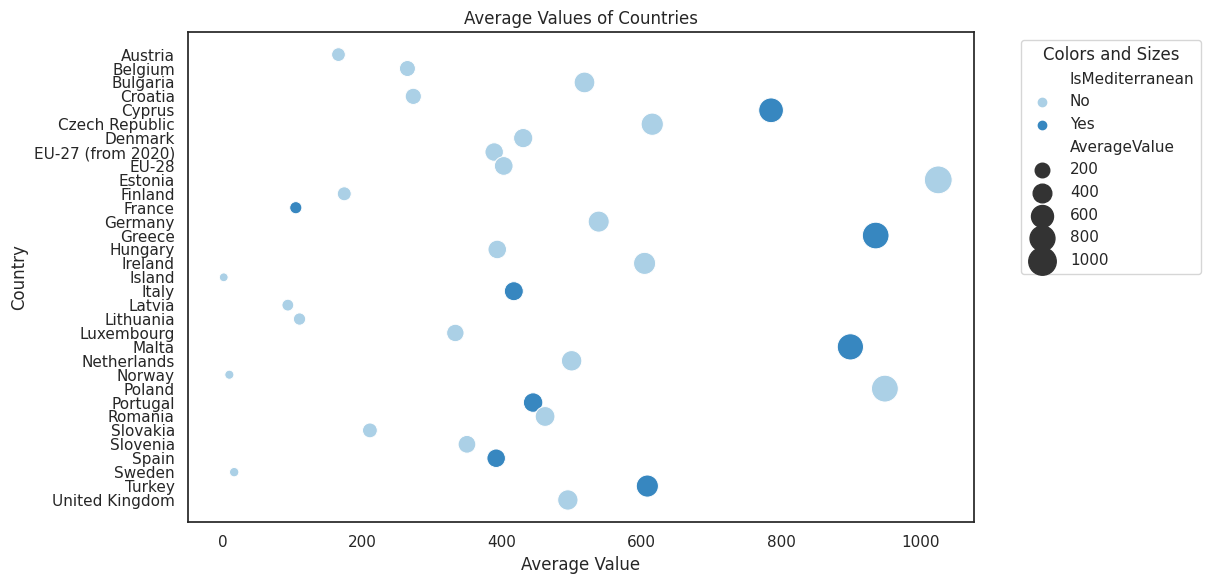

In [13]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AverageValue', y='CountryLong', data=df_mean, hue='IsMediterranean', 
                size='AverageValue', sizes=(40, 400),palette='Blues')
plt.xlabel('Average Value')
plt.ylabel('Country')
plt.title('Average Values of Countries')
plt.tight_layout()
plt.legend(title='Colors and Sizes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [14]:
df_dot = df.loc[(df['Year'] == '1990') | (df['Year'] == '2017')]
df_dot = df_dot.pivot_table(index="CountryLong", columns="Year", values="ValueNumeric")
df_dot = df_dot.reset_index()
df_dot.rename(columns={1990: "1990", 2017: "2017"}, inplace=True)
df_dot = df_dot.set_index("CountryLong").sort_values('2017')
df_dot["change"] = df_dot["2017"] / df_dot["1990"] - 1
df_dot = df_dot.drop("Island")

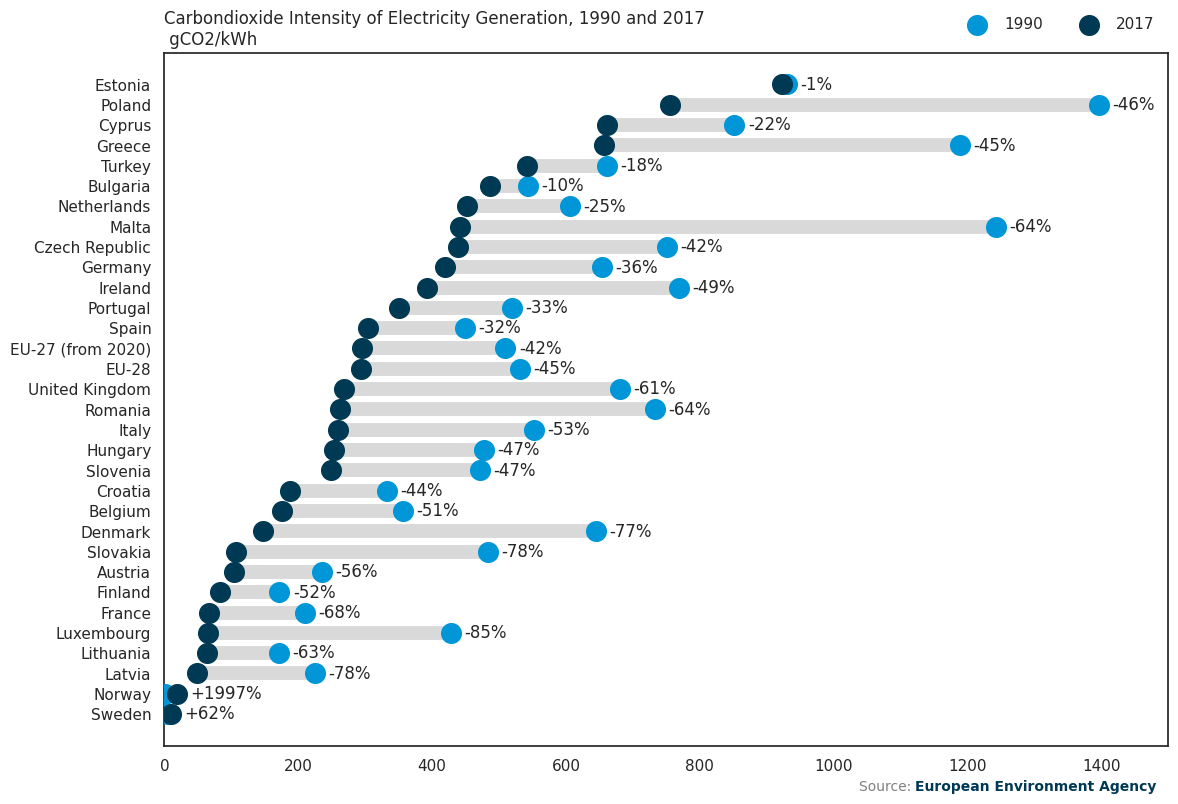

In [15]:
plt.figure(figsize=(12,8))
y_range = np.arange(1, len(df_dot.index) + 1)
colors = np.where(df_dot['2017'] > df_dot['1990'], '#d57883', '#d9d9d9')
plt.hlines(y=y_range, xmin=df_dot['1990'], xmax=df_dot['2017'],
           color=colors, lw=10)
plt.scatter(df_dot['1990'], y_range, color='#0096d7', s=200, label='1990', zorder=3)
plt.scatter(df_dot['2017'], y_range, color='#003953', s=200 , label='2017', zorder=3)
for (_, row), y in zip(df_dot.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["1990"], row["2017"]) + 20, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df_dot.index)
plt.title("Carbondioxide Intensity of Electricity Generation, 1990 and 2017\n gCO2/kWh", loc='left')
plt.xlim(0, 1500)
plt.gcf().subplots_adjust(left=0.35)
source = "Source: "
datasource = "European Environment Agency"
plt.figtext(0.77 ,0.001, source, ha="right", fontsize=10, color="gray")
plt.figtext(0.97, 0.001, datasource, ha="right", fontsize=10, color="#003953",fontweight="bold")
plt.tight_layout()
plt.show()